## Text Mining Acquire & Analyze 
### Part 2 - Analyzing the Twitter Data

For my data set share, I pulled the descriptions from the Twitter followers for Mitch McConnell and Amy McGrath. Mitch McConnell is a Republican Senator from Kentucky and the Republican Senate Majority leader who was recently re-elected. Amy McGrath is the Democrat who ran against him. 

The below code looks at the top 1,000 words from each candidates' followers, then just the unique top words. It takes the top unique words and creates a wordcloud based on the frequency. 

#### Cleaning and tokenizing the text data

In [1]:
import nltk
import numpy as np

from string import punctuation
from collections import Counter

from pprint import pprint # get some prettier printing of objects

from nltk.corpus import stopwords

sw = stopwords.words('english')
sws = stopwords.words('spanish')
swa = stopwords.words('arabic')

#### Cleaning & Tokenizing The Text

In [2]:
def get_patterns_1000(text) :    
    text_clean = [w for w in text.lower().split()]
    text_clean = [w for w in text_clean if w not in sw]
    text_clean = [w for w in text_clean if w.isalpha() or '#' in w]
    text_clean = [w for w in text_clean if w not in sws]
    
           
    total_tokens = len(text_clean)
    unique_tokens = len(set(text_clean))
    
    text_clean_len = [len(w) for w in text_clean]
    avg_token_len = np.mean(text_clean_len)
    
    lex_diversity =len(set(text_clean))/len(text_clean)
    
    top_1000 = Counter(text_clean).most_common(1000)
    
     
    # Now we'll fill out the dictionary. 
    results = {'tokens':total_tokens,
               'unique_tokens':unique_tokens, 
               'avg_token_length':avg_token_len,
               'lexical_diversity':lex_diversity,
               'top_1000':top_1000}

    return(results)


In [3]:
mitch = open("senatemajldr_followers.txt",'r',encoding='utf-8').read()
mitch_results = get_patterns_1000(mitch)
#mitch_results #commented out as this is a large print statement

{'tokens': 9846150,
 'unique_tokens': 1555600,
 'avg_token_length': 6.334185443041188,
 'lexical_diversity': 0.157990686715112,
 'top_1000': [('usa', 125910),
  ('love', 74764),
  ('united', 47469),
  ('states', 42436),
  ('new', 39538),
  ('trump', 39247),
  ('god', 31702),
  ('proud', 31049),
  ('#maga', 30869),
  ('life', 29858),
  ('ca', 25971),
  ('tx', 22801),
  ('american', 21919),
  ('john', 20638),
  ('news', 20408),
  ('retired', 19964),
  ('conservative', 19664),
  ('fl', 19231),
  ('like', 19059),
  ('ny', 18240),
  ('america', 16617),
  ('world', 16153),
  ('family', 16018),
  ('one', 15860),
  ('good', 15648),
  ('politics', 15639),
  ('country', 15584),
  ('people', 15160),
  ('president', 15111),
  ('david', 14898),
  ('us', 14862),
  ('michael', 14612),
  ('great', 14462),
  ('business', 14387),
  ('nigeria', 14183),
  ('#trump2020', 14075),
  ('political', 13859),
  ('father', 13763),
  ('india', 13752),
  ('jesus', 13269),
  ('man', 13111),
  ('dc', 13007),
  ('make'

In [4]:
amy = open("AmyMcGrathKY_followers.txt",'r',encoding='utf-8').read()
amy_results = get_patterns_1000(amy)
#amy_results #commented out as this is a large print statement

{'tokens': 4133492,
 'unique_tokens': 635767,
 'avg_token_length': 6.494152401891669,
 'lexical_diversity': 0.15380869250502965,
 'top_1000': [('usa', 60759),
  ('new', 24560),
  ('ca', 23814),
  ('love', 21909),
  ('#resist', 18520),
  ('proud', 16579),
  ('united', 16120),
  ('states', 14830),
  ('ny', 14179),
  ('mom', 11636),
  ('lover', 11116),
  ('life', 10582),
  ('trump', 10581),
  ('tx', 10424),
  ('retired', 10268),
  ('vote', 9981),
  ('san', 9870),
  ('like', 9122),
  ('#blm', 8887),
  ('world', 8210),
  ('former', 8129),
  ('blue', 8032),
  ('fl', 8031),
  ('#bidenharris2020', 7934),
  ('political', 7887),
  ('good', 7741),
  ('opinions', 7709),
  ('living', 7510),
  ('fan', 7494),
  ('ky', 7452),
  ('dc', 7416),
  ('#blacklivesmatter', 7347),
  ('one', 7294),
  ('dog', 7273),
  ('people', 6652),
  ('social', 6422),
  ('pa', 6375),
  ('music', 6344),
  ('il', 6328),
  ('make', 6310),
  ('views', 6191),
  ('us', 6002),
  ('wa', 5927),
  ('things', 5854),
  ('time', 5761),
 

#### Looking at the top words found in the Twitter followers' descriptions

In [5]:
#removing the frequency from the tuple so we just have the unique words
mitch_1 = (mitch_results["top_1000"])
mitch_2 = []
for word,freq in mitch_1:
    mitch_2.append(word)

In [6]:
#making this a set so we can easily compre the unique words
mitch_set = set(mitch_2)

In [7]:
#print(mitch_set)

In [8]:
#removing the frequency from the tuple so we just have the unique words
amy_1 = (amy_results["top_1000"])
amy_2 = []
for word,freq in amy_1:
    amy_2.append(word)

In [9]:
#making this a set so we can easily compre the unique words
amy_set = set(amy_2)

In [10]:
#this code is to find the unique words that are only top words for McConnnell's followers

only_mitch = mitch_set - amy_set
mitch_freq = []
for word in only_mitch:
    for w,f in mitch_1:
        if word == w:
            l = [w,f]
            mitch_freq.append(l)

In [11]:
#this is to sort the top words from highest frequency to lowest

def sort2(text_list):
    text_list.sort(key=lambda x: x[1],reverse=True)
    return text_list

In [12]:
print(sort2(mitch_freq)[:100])

[['#maga', 30869], ['nigeria', 14183], ['#trump2020', 14075], ['india', 13752], ['#kag', 12284], ['pakistan', 9281], ['maga', 8823], ['#wwg1wga', 8459], ['hong', 8110], ['kong', 6725], ['ali', 6520], ['christ', 6228], ['bangladesh', 5932], ['bless', 5861], ['ghana', 5768], ['#2a', 5654], ['kumar', 5642], ['khan', 5607], ['kenya', 5569], ['republic', 5318], ['ahmed', 4536], ['lord', 4534], ['et', 4352], ['deplorable', 4213], ['africa', 3666], ['mohamed', 3553], ['jr', 3456], ['singh', 3391], ['china', 3371], ['je', 3301], ['liberty', 3184], ['easy', 3104], ['#patriot', 3100], ['muhammad', 3093], ['#trump', 2982], ['trust', 2939], ['#nra', 2881], ['tanzania', 2873], ['honest', 2870], ['uganda', 2823], ['afghanistan', 2738], ['constitutional', 2734], ['faith', 2730], ['constitution', 2717], ['jerry', 2697], ['gov', 2659], ['ron', 2597], ['parler', 2553], ['jose', 2529], ['dennis', 2516], ['q', 2497], ['iraq', 2456], ['محمد', 2454], ['officials', 2445], ['du', 2440], ['#prolife', 2422], ['

In [13]:
#this code is to find the unique words that are only top words for McGrath's followers

only_amy = amy_set - mitch_set
amy_freq = []
for word in only_amy:
    for w,f in amy_1:
        if word == w:
            l = [w,f]
            amy_freq.append(l)


In [14]:
print(sort2(amy_freq)[:100])

[['#blm', 8887], ['#bidenharris2020', 7934], ['#blacklivesmatter', 7347], ['#fbr', 5428], ['#theresistance', 4704], ['#resistance', 4146], ['#voteblue', 3844], ['progressive', 3303], ['wear', 3094], ['biden', 2579], ['#biden2020', 2564], ['mask', 2262], ['#bluewave', 2176], ['#vote', 2032], ['democracy', 2017], ['lifelong', 1877], ['blm', 1787], ['voting', 1764], ['#bidenharris', 1702], ['voted', 1689], ['seattle', 1614], ['climate', 1583], ['wine', 1458], ['#votebluenomatterwho', 1445], ['equality', 1435], ['resist', 1406], ['#resister', 1375], ['nerd', 1321], ['junkie', 1288], ['beth', 1285], ['expressed', 1259], ['formerly', 1257], ['katie', 1253], ['photographer', 1246], ['educator', 1244], ['blocked', 1237], ['resistance', 1236], ['resister', 1234], ['film', 1223], ['kate', 1217], ['stuff', 1196], ['feminist', 1191], ['cats', 1149], ['british', 1137], ['write', 1134], ['union', 1110], ['beer', 1103], ['erin', 1096], ['early', 1090], ['#bluewave2020', 1089], ['mental', 1081], ['pro

### Making a Word Cloud

The below code makes a wordcloud from the top words from each candidates Twitter follower descriptions that were unique to that candidate and not shared by the top words of the other candidate. 

In [15]:
import PIL
import wordcloud

In [16]:
!pip install wordcloud

In [17]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline


# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

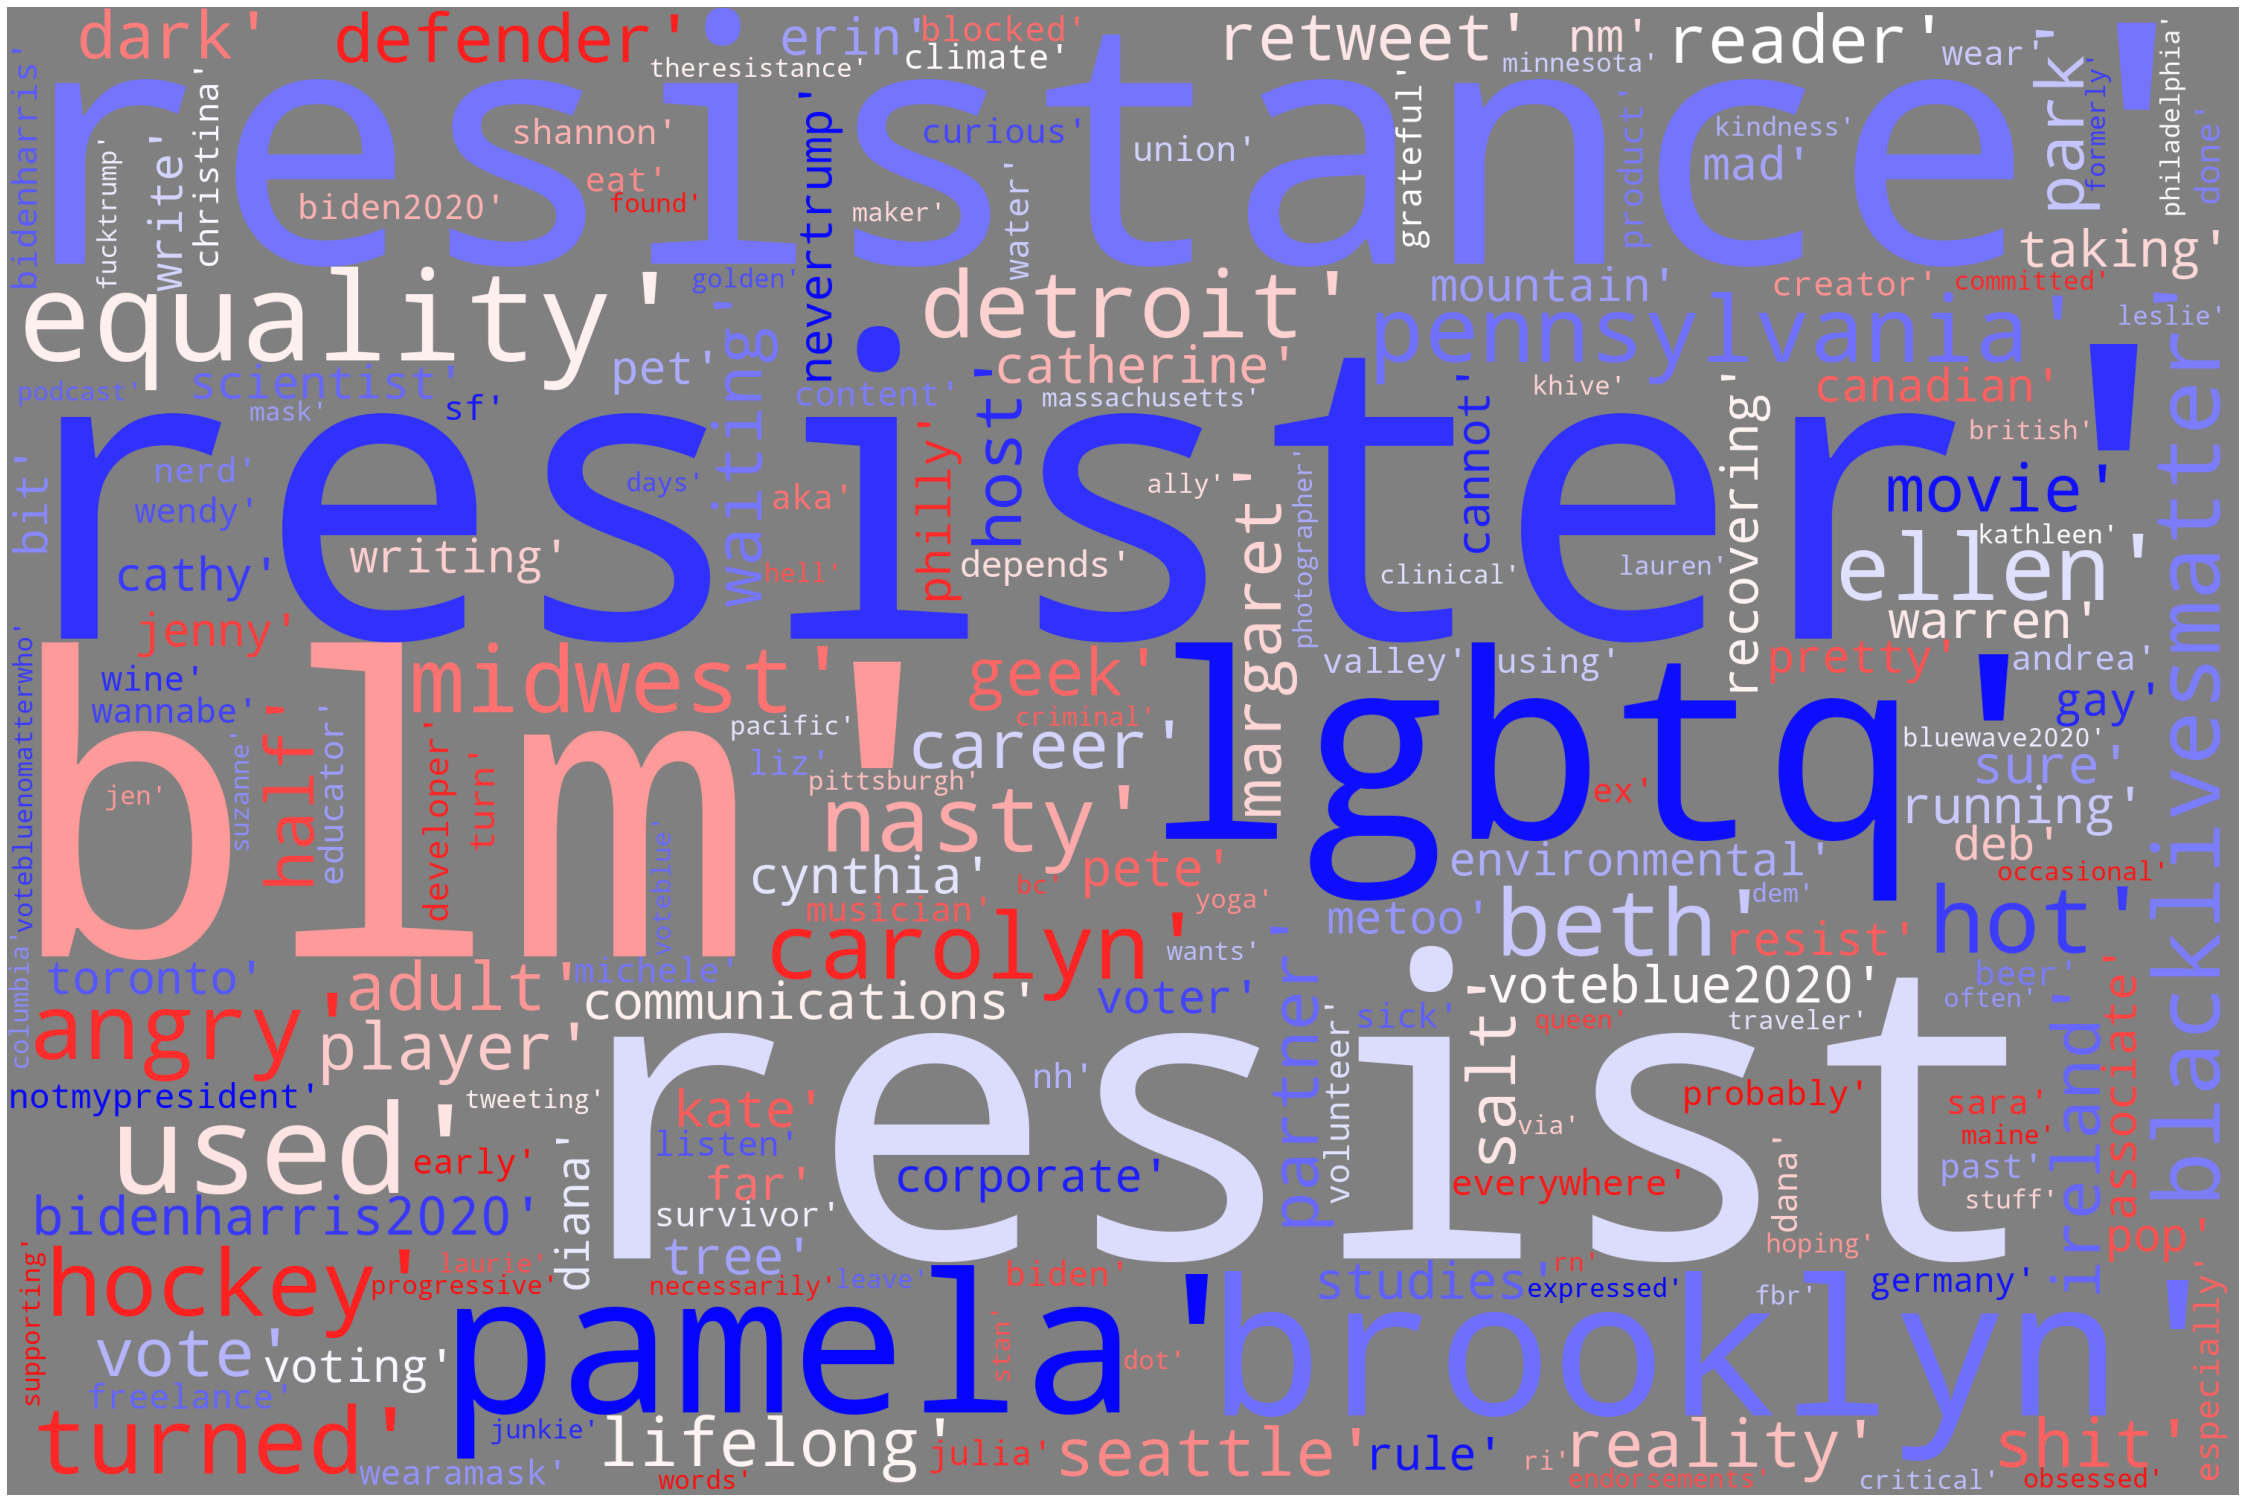

In [18]:
amy_string = str(only_amy) #the word cloud requires a string

# Import package
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
#the .generate() is where you list your string
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='gray', colormap='bwr', collocations=False, stopwords = STOPWORDS).generate(amy_string)

# Plot
plot_cloud(wordcloud)

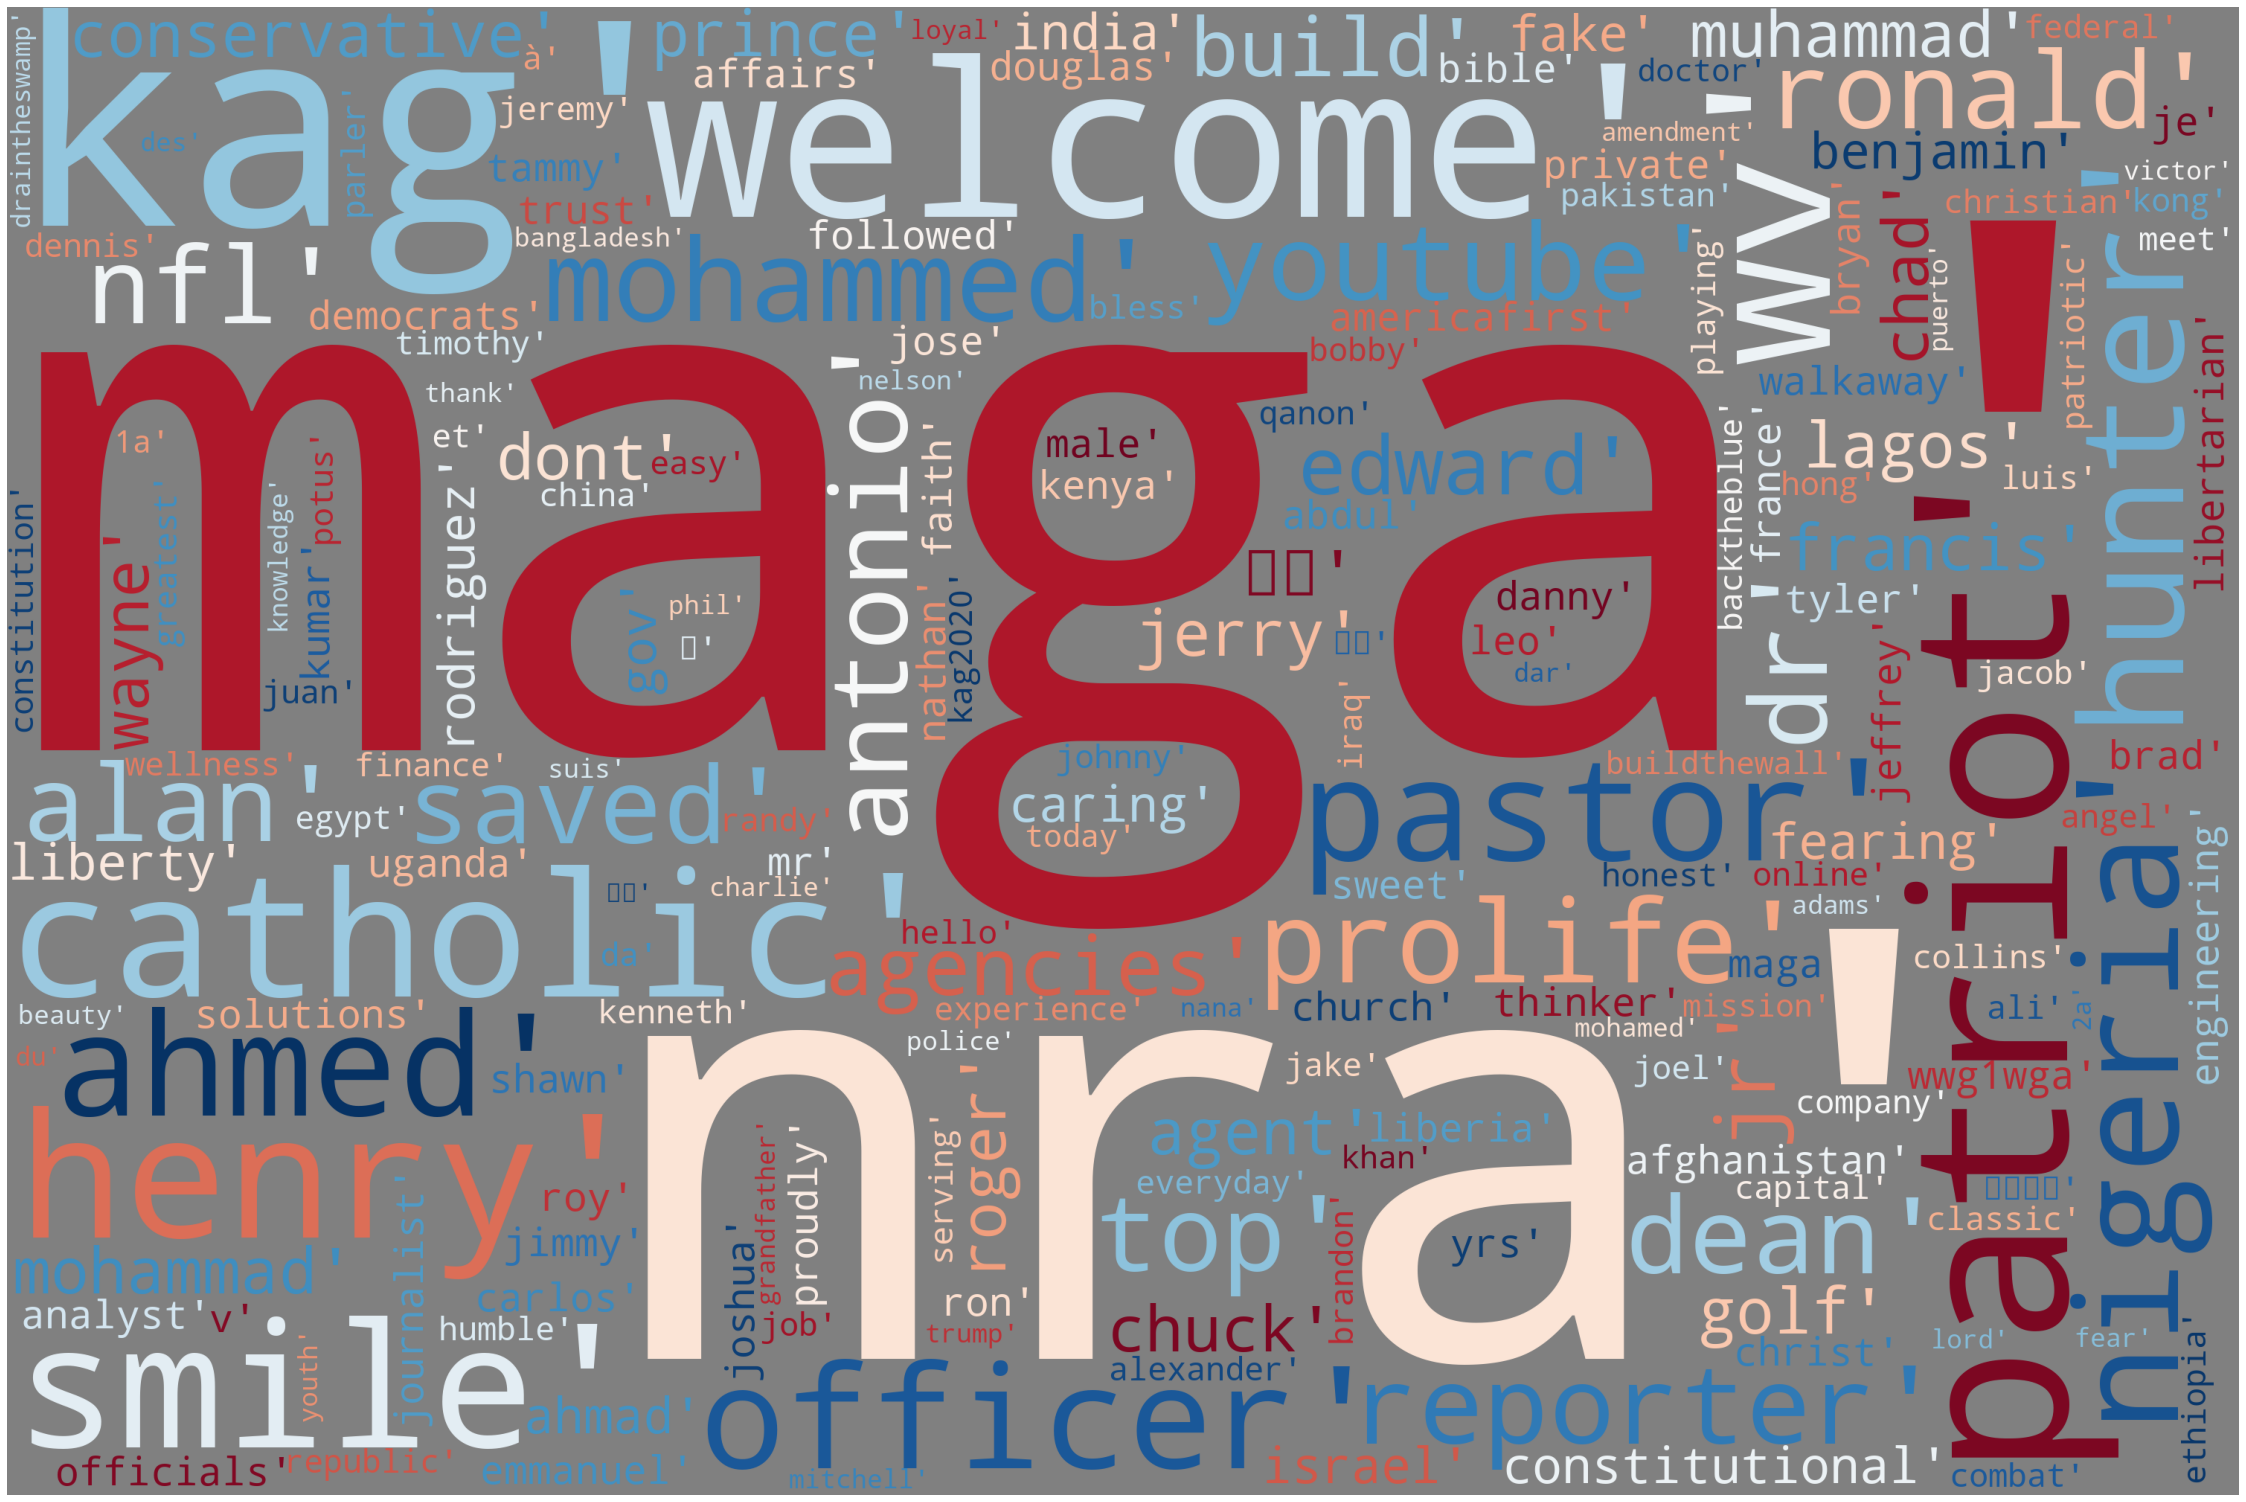

In [21]:
mitch_string = str(only_mitch) #the word cloud requires a string

# Generate word cloud
# I changed the .generate to mitch_string
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='gray', colormap='RdBu', collocations=False, stopwords = STOPWORDS).generate(mitch_string)

# Plot
plot_cloud(wordcloud)